In [35]:
import os

filenames = [filename for filename in os.listdir(".") if filename.endswith("proba.pkl")]

In [43]:
filenames[0]

'model_SIO_test_US_multi_scores.proba.pkl'

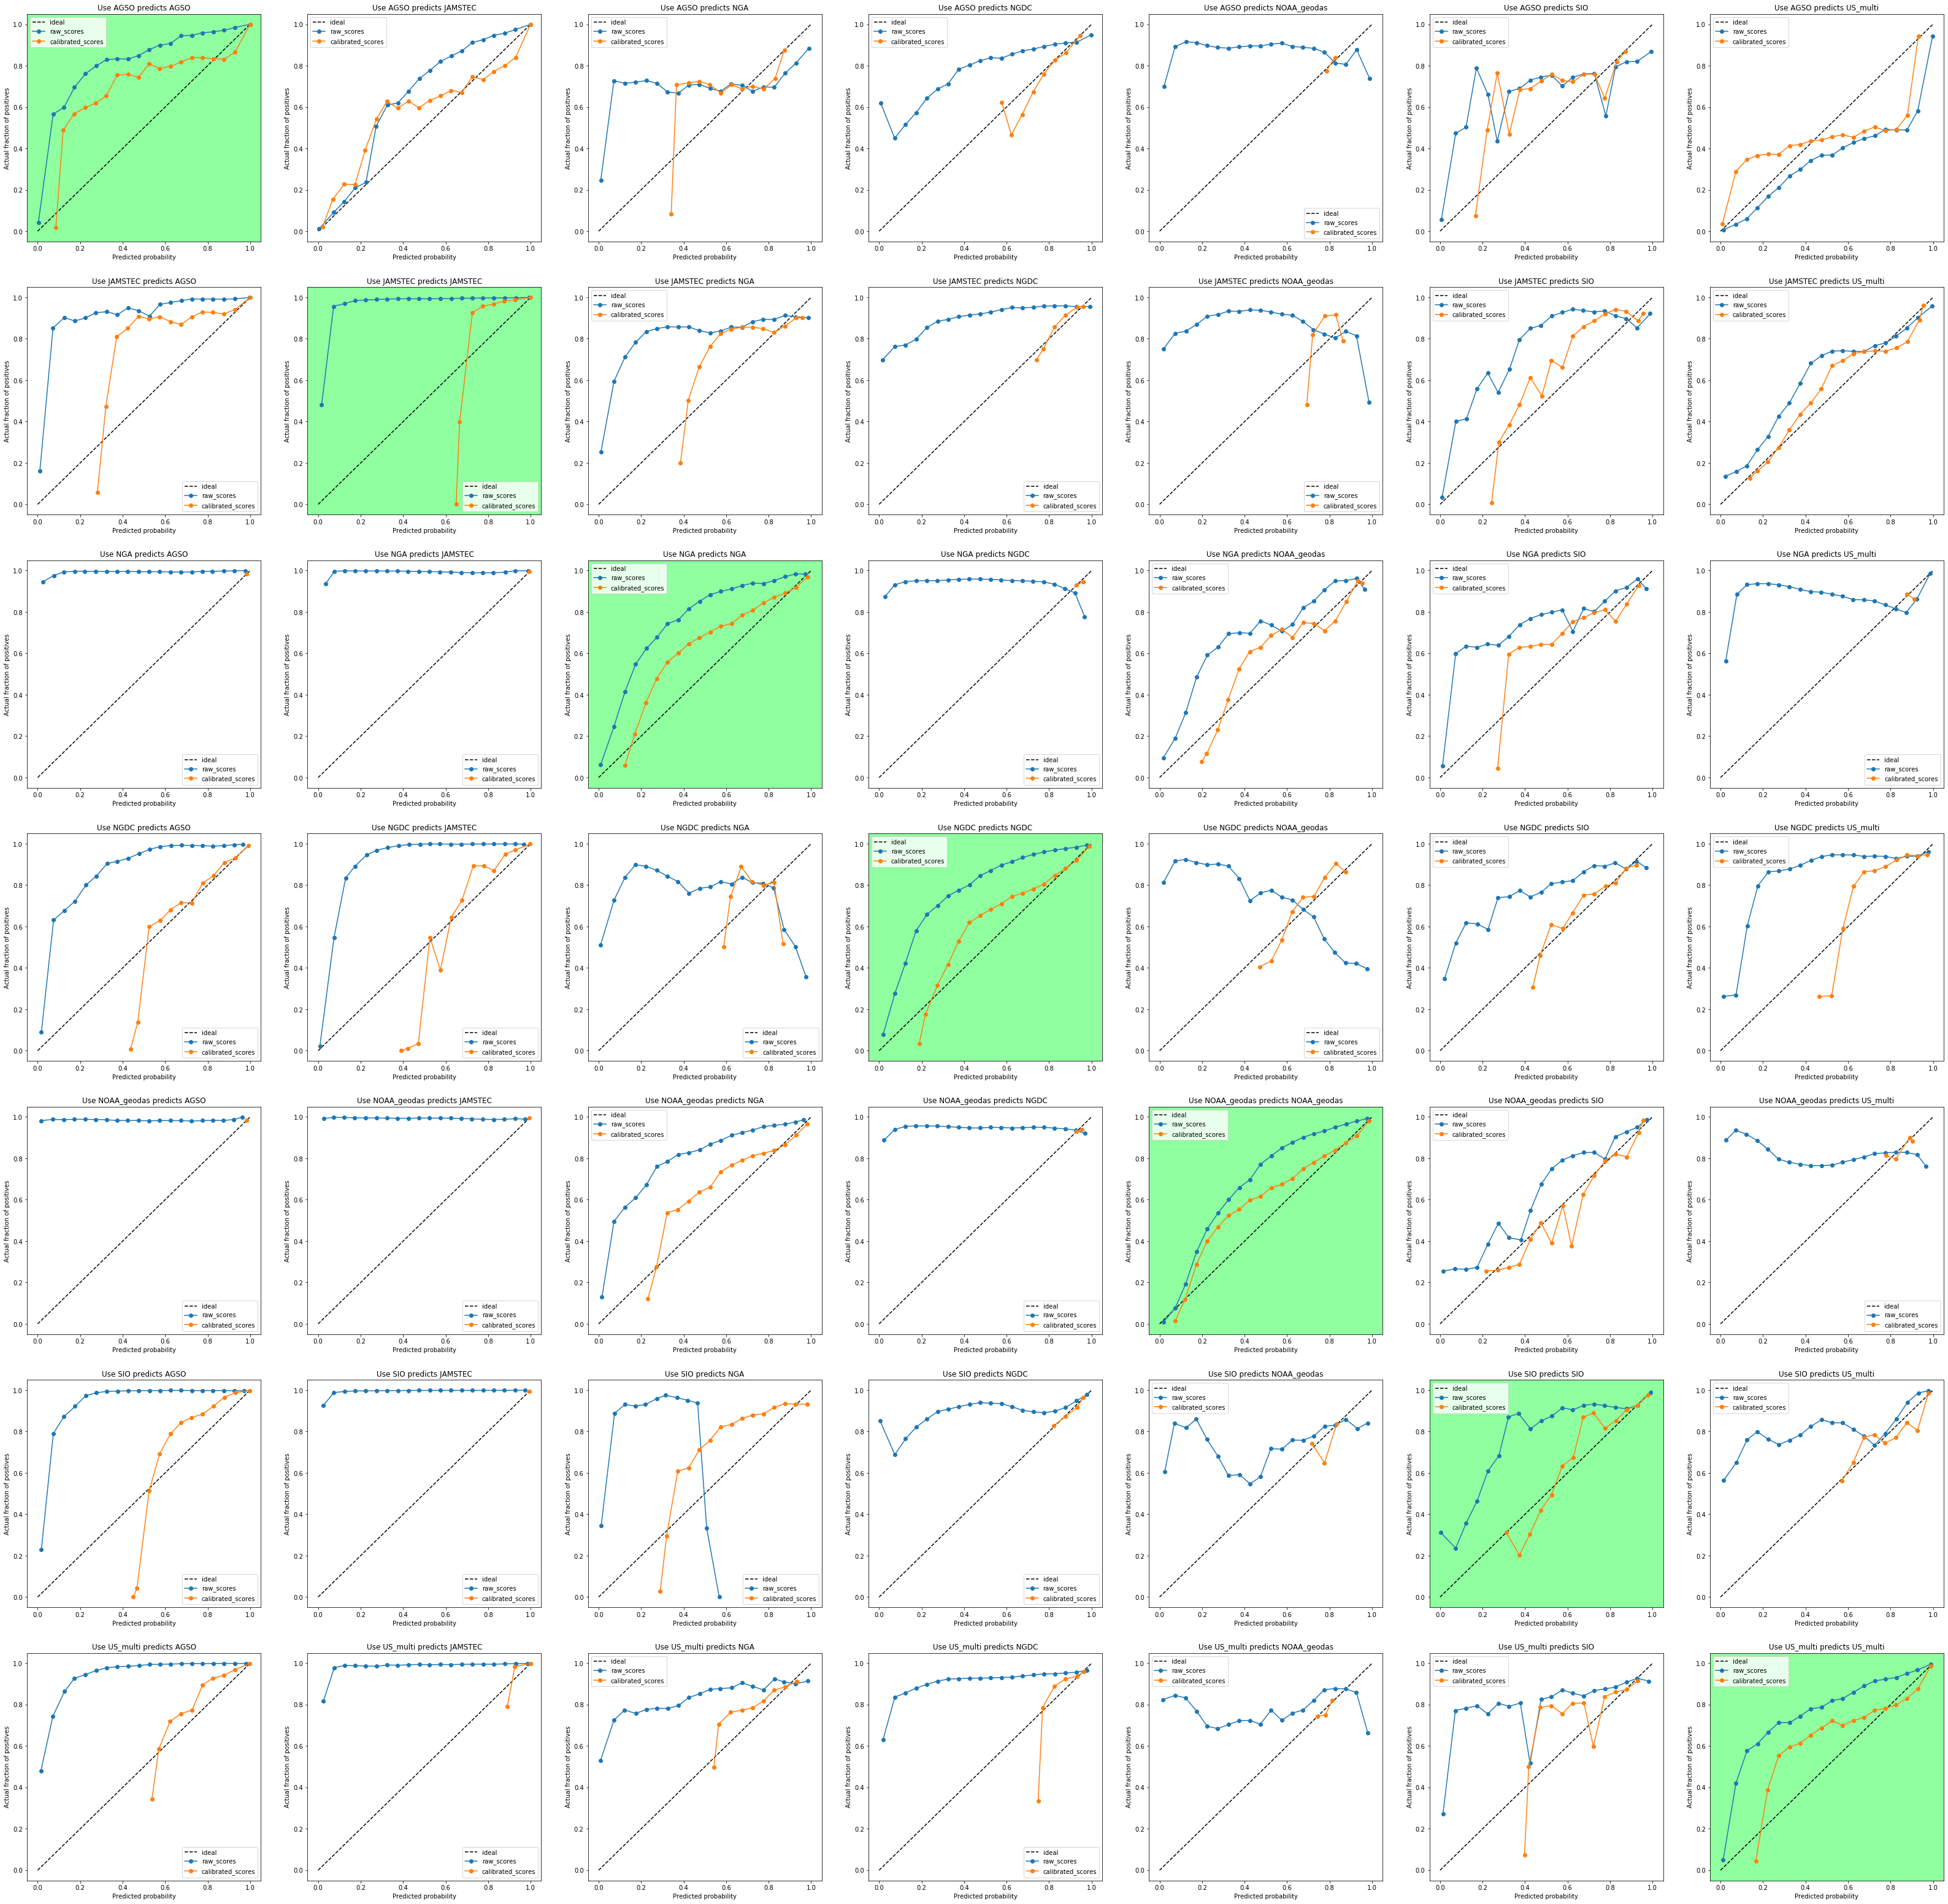

In [60]:
%matplotlib inline

import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt


regions = ['AGSO', 'JAMSTEC', 'NGA', 'NGDC', 'NOAA_geodas', 'SIO', 'US_multi']
filename_format = "model_{}_test_{}_scores.proba.pkl"


fig, ax_list = plt.subplots(7, 7, figsize=(56, 56))
bins = np.arange(0.05, 1.00, 0.05)
for i, model_name in enumerate(regions):
    for j, test_name in enumerate(regions):
        filename = filename_format.format(model_name, test_name)
        with open(filename, "rb") as f:
            proba, scores, labels = pickle.load(f)

        prob_df = pd.DataFrame({'y': labels, 'raw_scores': scores.flatten(), 'cali_scores': proba[:, 1]})
        prob_df.loc[:,'raw_prob_bin'] = np.digitize(prob_df['raw_scores'], bins)
        prob_df.loc[:,'raw_prob_bin_val'] = prob_df['raw_prob_bin'].replace(dict(zip(range(len(bins)), bins)))
        prob_df.loc[:,'cali_prob_bin'] = np.digitize(prob_df['cali_scores'], bins)
        prob_df.loc[:,'cali_prob_bin_val'] = prob_df['cali_prob_bin'].replace(dict(zip(range(len(bins)), bins)))


        # plotting ideal line
        ax = ax_list[i][j]
        ax.plot([0,1],[0,1], 'k--', label='ideal')

        # plotting raw scores
        calibration_y = prob_df.groupby('raw_prob_bin_val')['y'].mean()
        calibration_x = prob_df.groupby('raw_prob_bin_val')['raw_scores'].mean()
        ax.plot(calibration_x, calibration_y, marker='o', label='raw_scores')
        # plotting calibrated scores
        calibration_y = prob_df.groupby('cali_prob_bin_val')['y'].mean()
        calibration_x = prob_df.groupby('cali_prob_bin_val')['cali_scores'].mean()
        ax.plot(calibration_x, calibration_y, marker='o', label='calibrated_scores')

        # legend and titles
        ax.set_title('Use {} predicts {}'.format(model_name, test_name))
        ax.set_xlabel('Predicted probability')
        ax.set_ylabel('Actual fraction of positives')
        if i == j:
            ax.set_facecolor('xkcd:mint green')
        ax.legend();

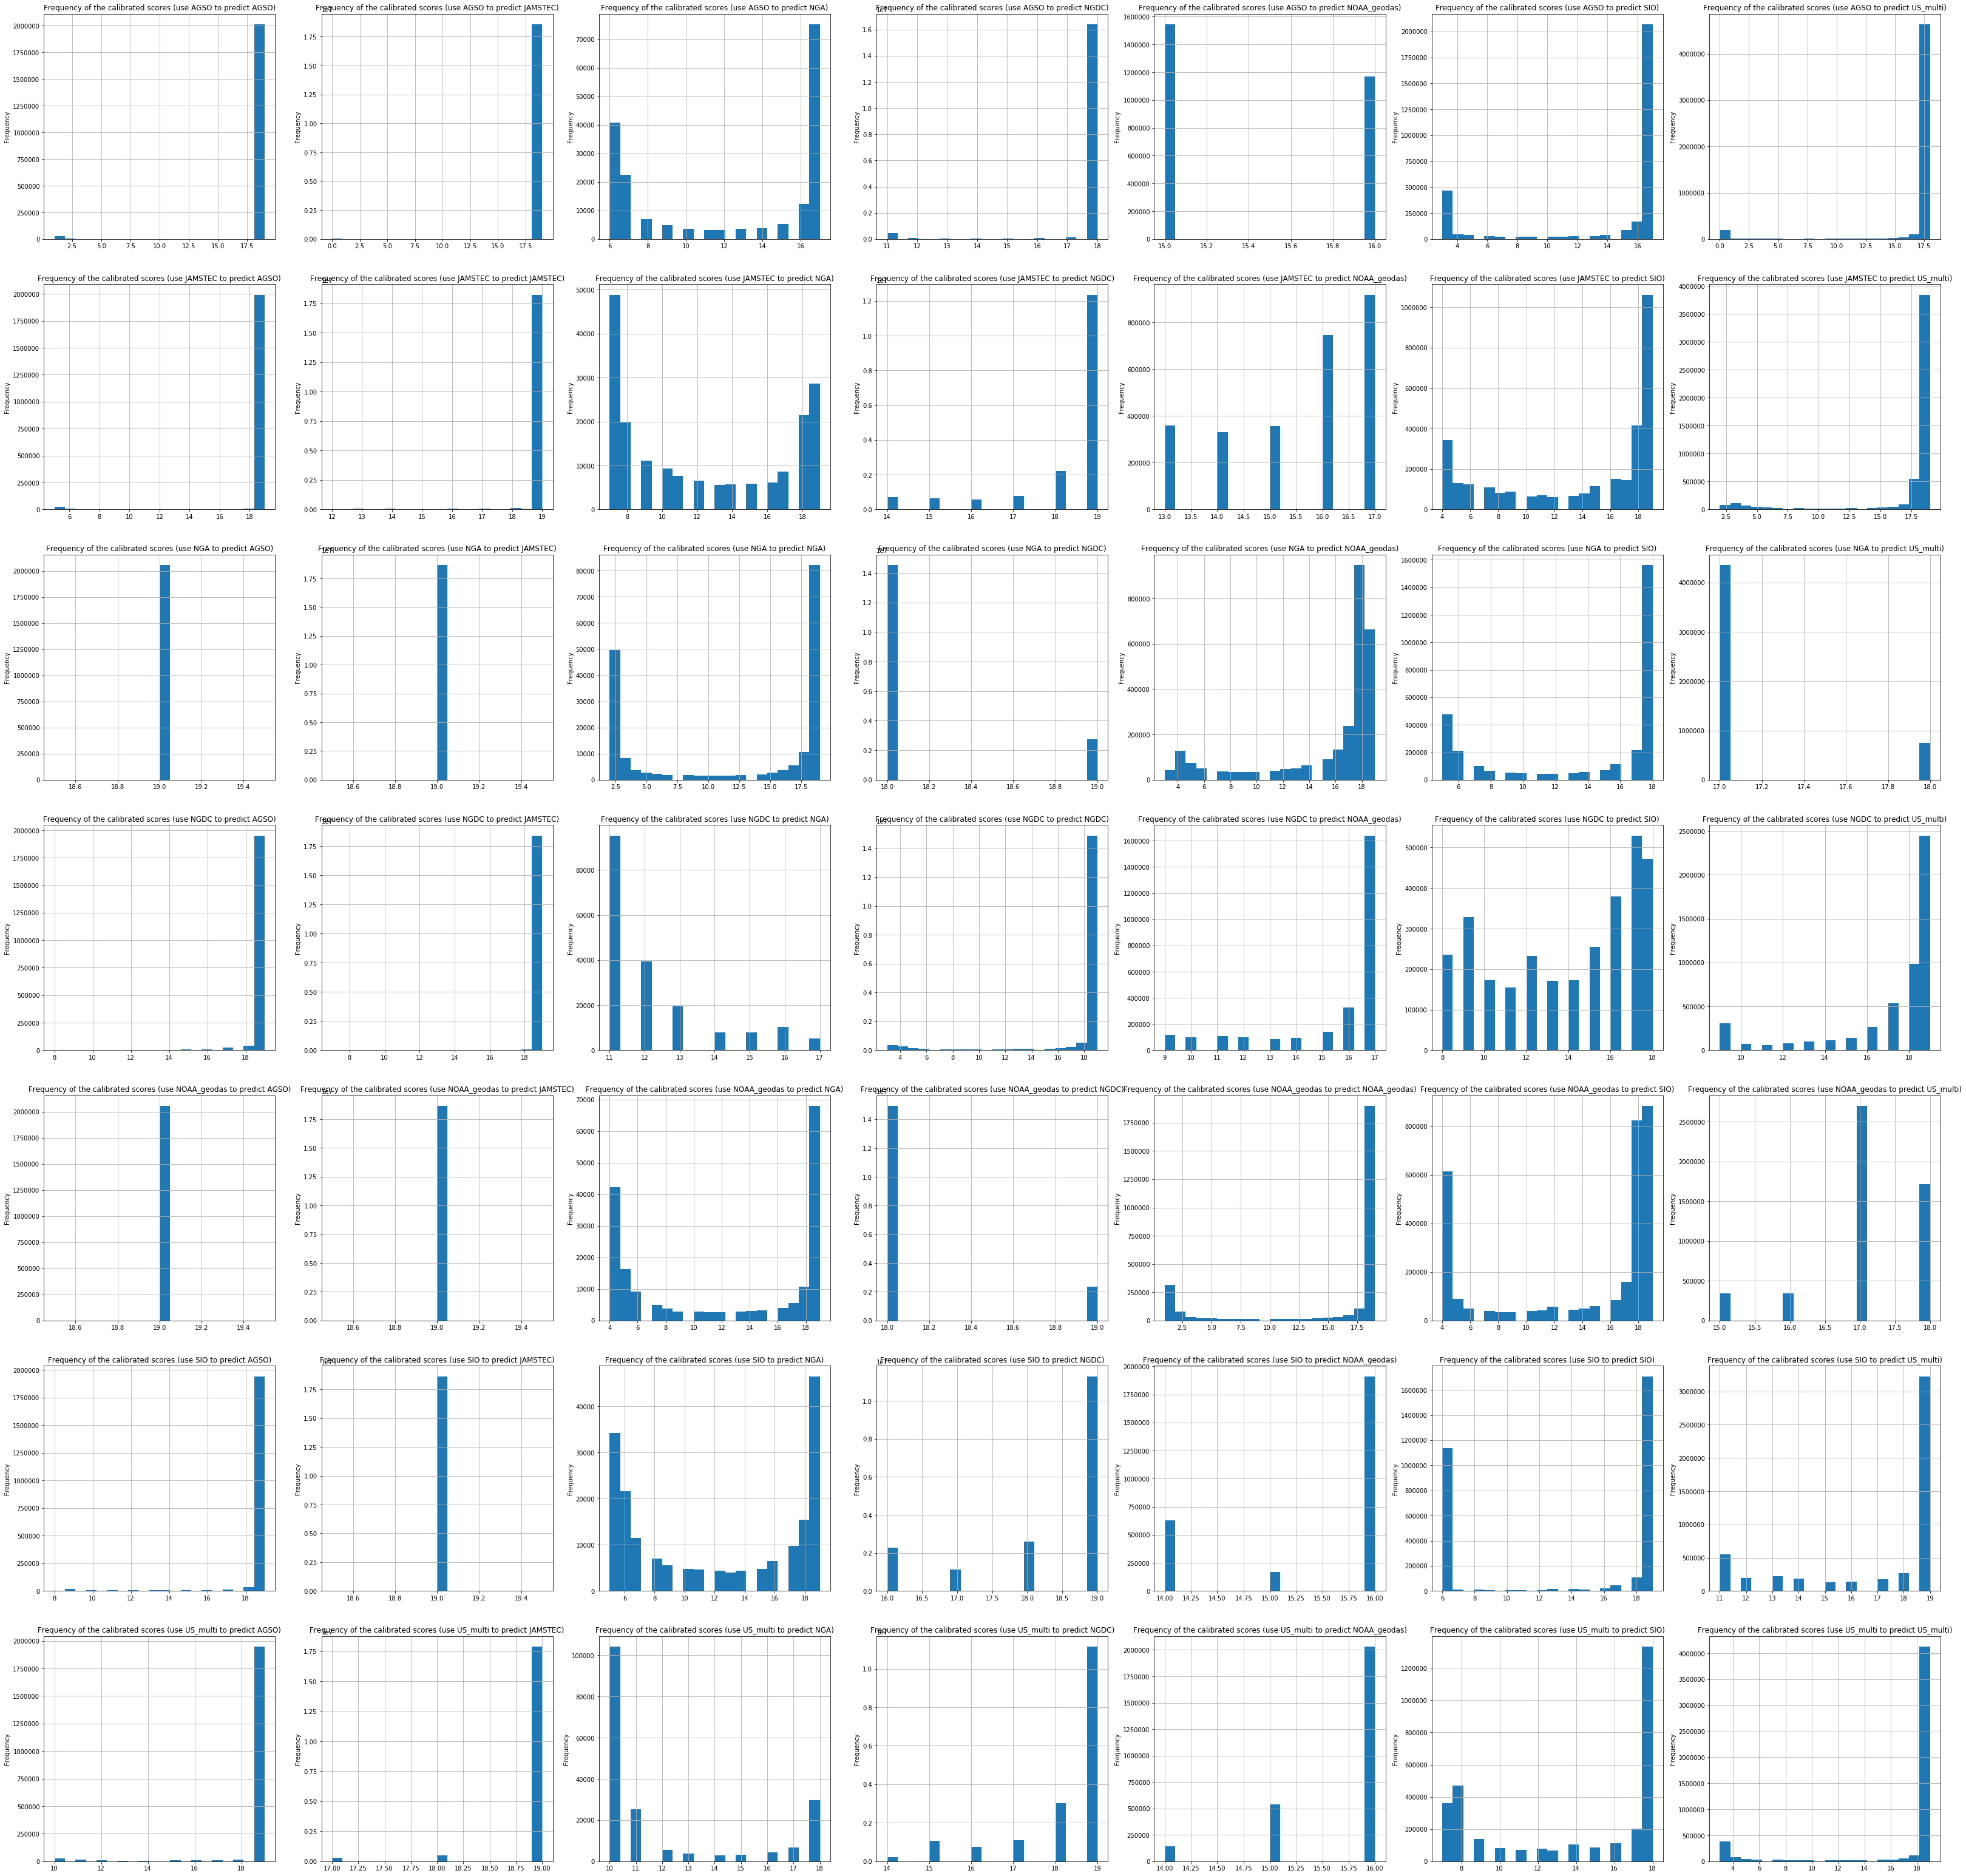

In [59]:
fig, ax_list = plt.subplots(7, 7, figsize=(56, 56))
bins = np.arange(0.05, 1.0, 0.05)
for i, model_name in enumerate(regions):
    for j, test_name in enumerate(regions):
        filename = filename_format.format(model_name, test_name)
        with open(filename, "rb") as f:
            proba, scores, labels = pickle.load(f)

        prob_df = pd.DataFrame({'y': labels, 'raw_scores': scores.flatten(), 'cali_scores': proba[:, 1]})
        # prob_df.loc[:,'raw_prob_bin'] = np.digitize(prob_df['raw_scores'], bins)
        # prob_df.loc[:,'raw_prob_bin_val'] = prob_df['raw_prob_bin'].replace(dict(zip(range(len(bins)), bins)))
        prob_df.loc[:,'cali_prob_bin'] = np.digitize(prob_df['cali_scores'], bins)
        prob_df.loc[:,'cali_prob_bin_val'] = prob_df['cali_prob_bin'].replace(dict(zip(range(len(bins)), bins)))


        ax = ax_list[i][j]
        prob_df["cali_prob_bin"].hist(bins=20, ax=ax)

        # legend and titles
        ax.set_title('Frequency of the calibrated scores (use {} to predict {})'.format(model_name, test_name))
        ax.set_xlabel('')
        ax.set_ylabel('Frequency');

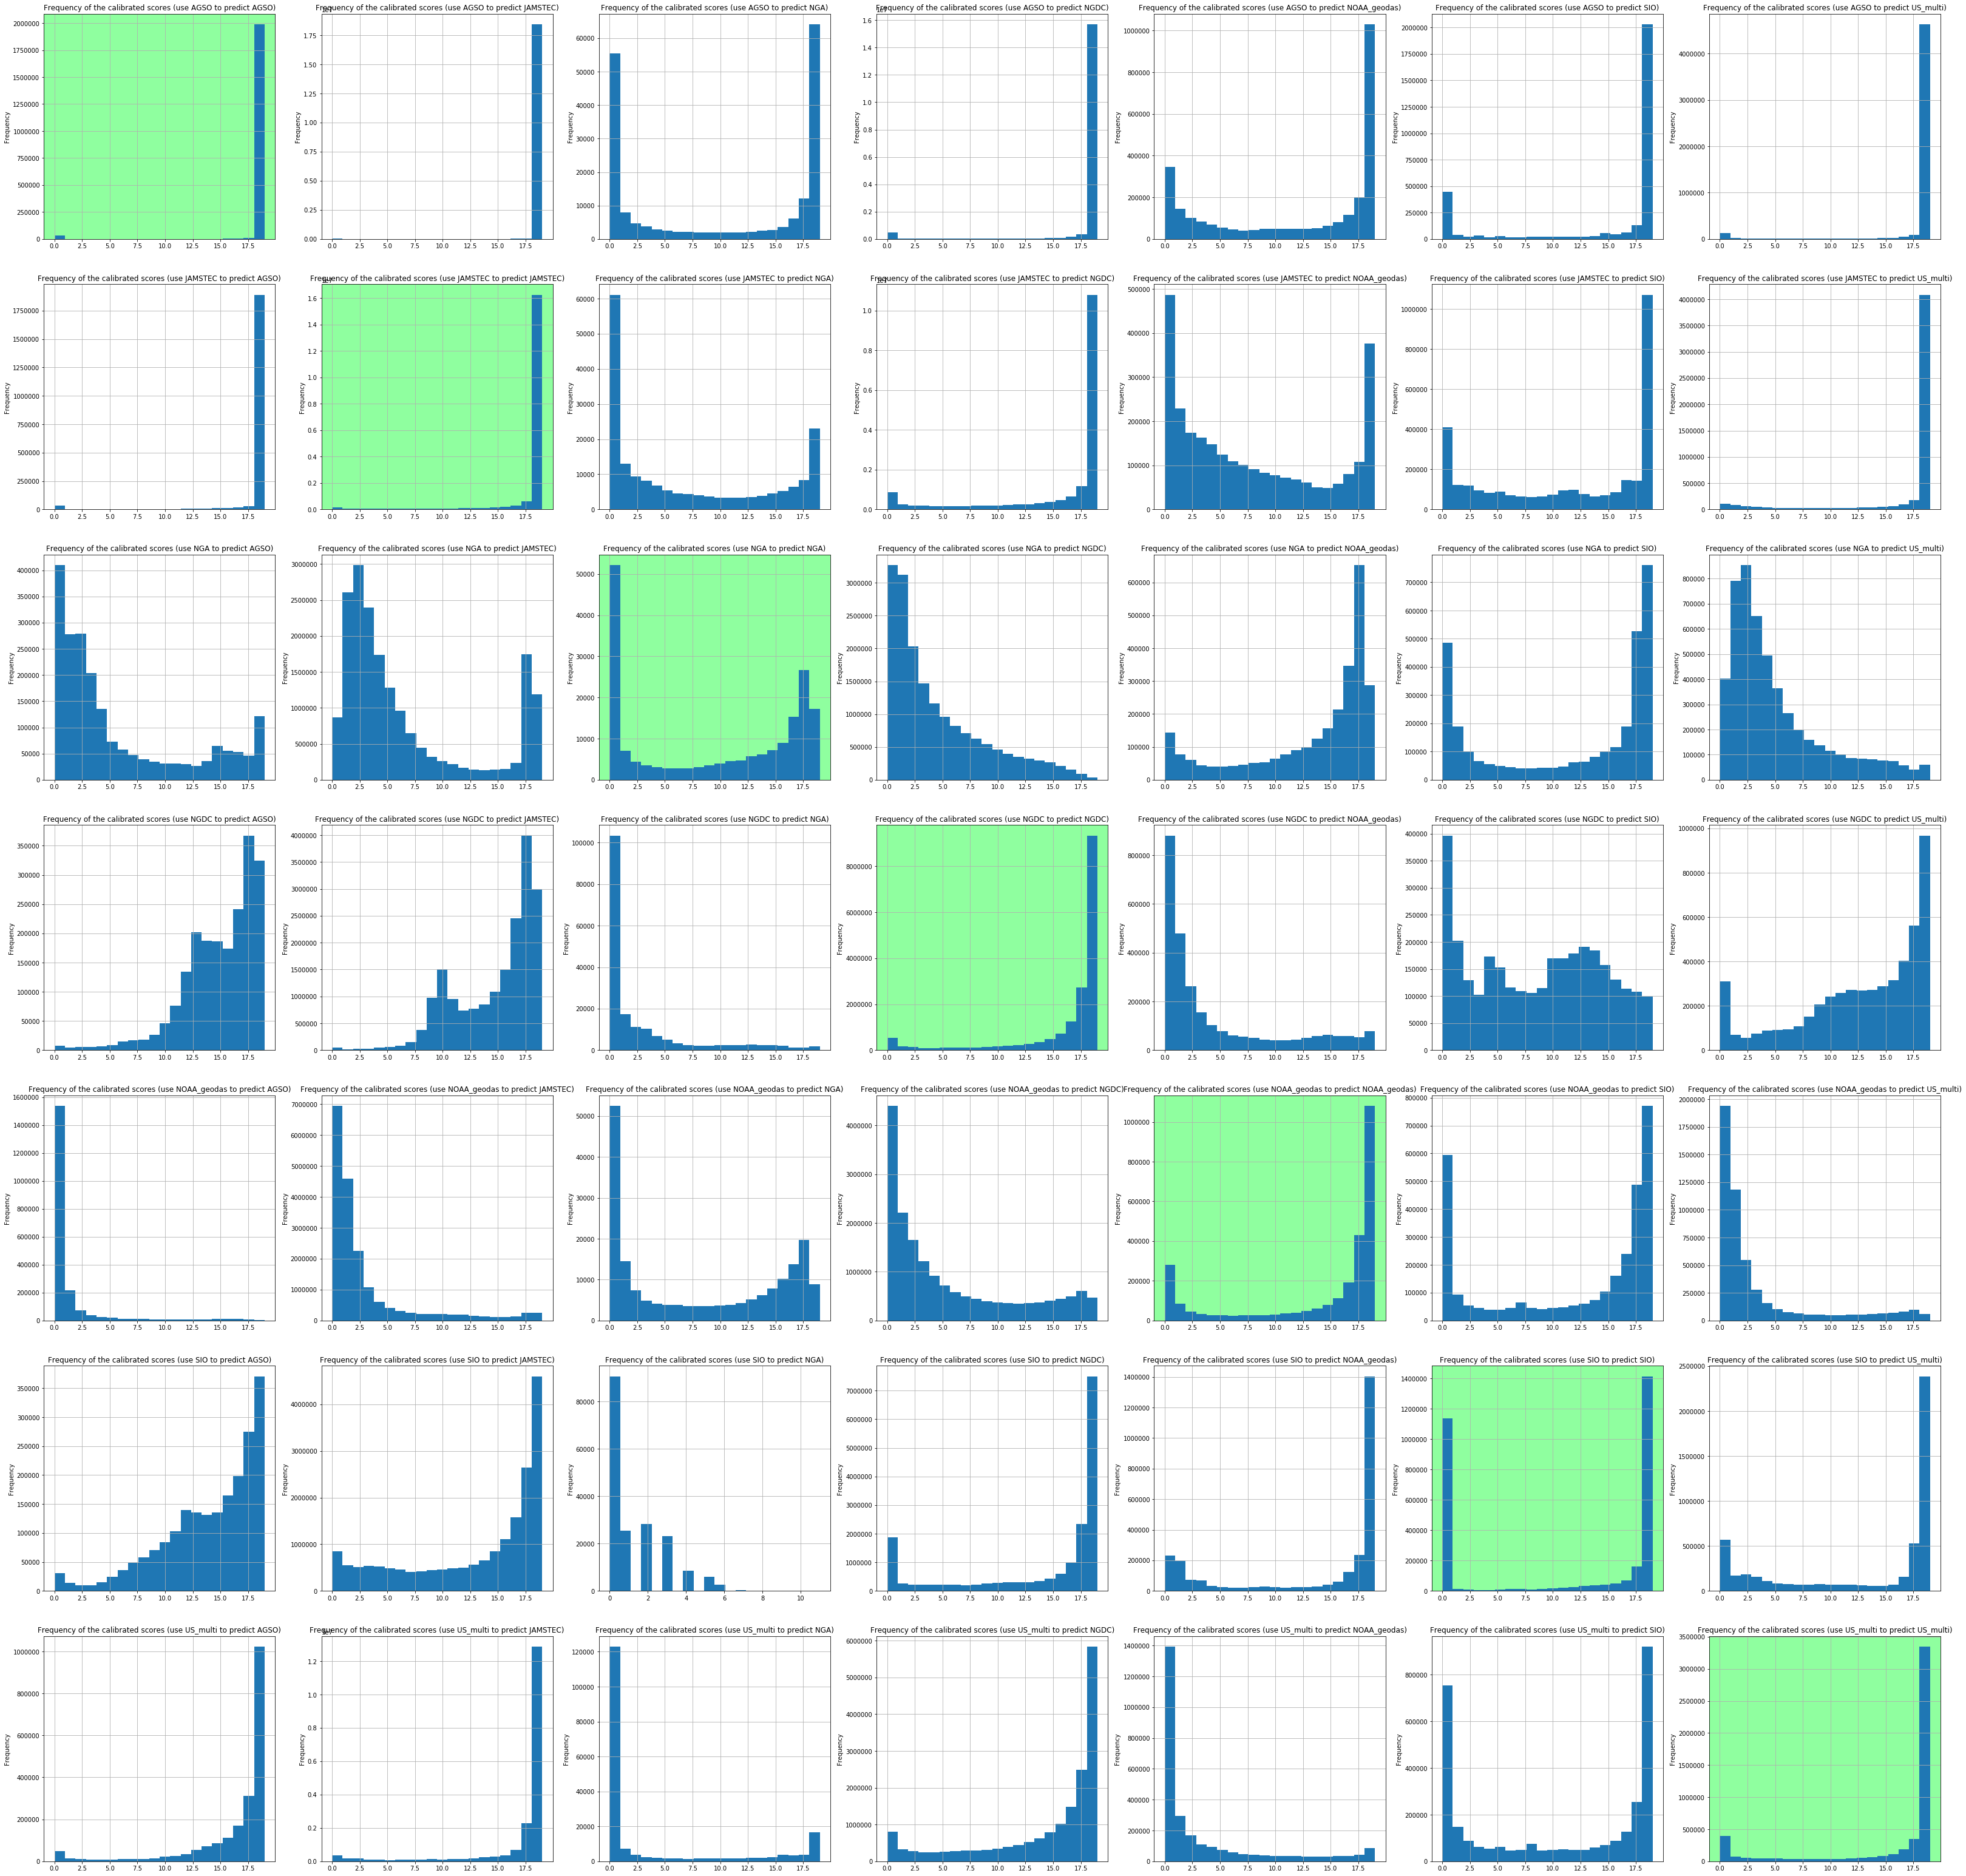

In [63]:
fig, ax_list = plt.subplots(7, 7, figsize=(56, 56))
bins = np.arange(0.05, 1.0, 0.05)
for i, model_name in enumerate(regions):
    for j, test_name in enumerate(regions):
        filename = filename_format.format(model_name, test_name)
        with open(filename, "rb") as f:
            proba, scores, labels = pickle.load(f)

        prob_df = pd.DataFrame({'y': labels, 'raw_scores': scores.flatten(), 'cali_scores': proba[:, 1]})
        prob_df.loc[:,'raw_prob_bin'] = np.digitize(prob_df['raw_scores'], bins)
        prob_df.loc[:,'raw_prob_bin_val'] = prob_df['raw_prob_bin'].replace(dict(zip(range(len(bins)), bins)))
        prob_df.loc[:,'cali_prob_bin'] = np.digitize(prob_df['cali_scores'], bins)
        prob_df.loc[:,'cali_prob_bin_val'] = prob_df['cali_prob_bin'].replace(dict(zip(range(len(bins)), bins)))


        ax = ax_list[i][j]
        prob_df["raw_prob_bin"].hist(bins=20, ax=ax)

        # legend and titles
        ax.set_title('Frequency of the calibrated scores (use {} to predict {})'.format(model_name, test_name))
        ax.set_xlabel('')
        ax.set_ylabel('Frequency');
        if i == j:
            ax.set_facecolor('xkcd:mint green')